# Data Cleaning and Preperation

I will be cleaning and preparing the "Fashion Retail Sales" dataset. The "Fashion Retail Sales" is a comprehensive collection of data representing sales transactions [2022-2023] from a clothing store. This dataset provides valuable insights into the purchasing behavior of customers, the items they buy, the payment methods used, and their satisfaction levels with the products.

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from numpy import nan as NA

In [2]:
df=pd.read_csv("Fashion_Retail_Sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [4]:
df.shape

(3400, 6)

In [5]:
df.count()

Customer Reference ID    3400
Item Purchased           3400
Purchase Amount (USD)    2750
Date Purchase            3400
Review Rating            3076
Payment Method           3400
dtype: int64

In [6]:
df.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [7]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


# Removing duplicates (if any)

In [8]:
df= df.drop_duplicates()

In [9]:
df.shape

(3400, 6)

# Checking for Null Values 

In [10]:
df.isna().sum() 

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

# Taking care of the Null Values

Dataset has a lot of missing values so first I will try to see if there are other items here that fit the description and will replace said values in missing

In [11]:
df[df['Purchase Amount (USD)'].isna() | df['Review Rating'].isna()]

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
9,4010,Loafers,4233.0,2023-06-11,NaN,Credit Card
12,4068,Pajamas,3728.0,2022-12-09,NaN,Credit Card
15,4096,Poncho,2383.0,2023-04-10,NaN,Credit Card
19,4103,Romper,4465.0,2022-11-21,NaN,Credit Card
...,...,...,...,...,...,...
3382,4012,Jacket,NaN,2023-08-25,1.9,Credit Card
3385,4110,Boots,NaN,2023-09-17,2.5,Credit Card
3389,4102,Blazer,NaN,2022-11-18,3.1,Credit Card
3390,4000,Vest,NaN,2023-03-03,1.5,Cash


In [12]:
df['Customer Reference ID'].unique()

array([4018, 4115, 4019, 4097, 3997, 4080, 4055, 3973, 4044, 4010, 4108,
       4067, 4068, 4102, 4096, 4017, 4001, 3976, 4103, 4081, 3986, 4109,
       4075, 4040, 4099, 3981, 4070, 4002, 4035, 4060, 3974, 4110, 3984,
       4054, 4083, 4122, 3972, 3980, 4012, 3992, 4105, 4119, 3957, 3994,
       3995, 4072, 4093, 4031, 4056, 4114, 4104, 4071, 4007, 4009, 4038,
       4033, 4034, 4045, 3979, 4106, 3959, 4113, 4087, 3989, 4032, 4051,
       3970, 4100, 4048, 3985, 4029, 3964, 4057, 4117, 4011, 4078, 4005,
       4049, 4063, 3996, 4030, 3991, 3975, 3961, 3993, 3978, 4121, 4073,
       4111, 4065, 4116, 4003, 4098, 4047, 4014, 4004, 3958, 4084, 4085,
       4025, 4062, 4050, 3965, 3966, 3977, 4091, 4028, 4076, 4089, 4090,
       4077, 4118, 4095, 4036, 4088, 4041, 4064, 3999, 4101, 4023, 4000,
       3963, 4086, 4021, 3990, 4027, 4022, 3960, 4092, 4069, 4120, 4024,
       4059, 4016, 4037, 3967, 4026, 4042, 3982, 4107, 4006, 4043, 3983,
       4046, 4013, 3971, 3988, 3987, 4053, 4066, 40

I am going to replace the huge set of missing values in the "Purchase Amount (USD)" feature with a mean/median value of the category associated with it (i.e the item concerned).

In [13]:
#Displaying the unique components of 'Items Purchased' feature
df['Item Purchased'].unique()

array(['Handbag', 'Tunic', 'Tank Top', 'Leggings', 'Wallet', 'Onesie',
       'Jacket', 'Trousers', 'Jeans', 'Loafers', 'Slippers', 'Bowtie',
       'Pajamas', 'Trench Coat', 'Poncho', 'Gloves', 'Romper', 'T-shirt',
       'Flip-Flops', 'Shorts', 'Blazer', 'Boots', 'Belt', 'Hoodie',
       'Sweater', 'Blouse', 'Swimsuit', 'Kimono', 'Cardigan', 'Socks',
       'Pants', 'Scarf', 'Backpack', 'Dress', 'Camisole', 'Sneakers',
       'Flannel Shirt', 'Tie', 'Polo Shirt', 'Umbrella', 'Hat', 'Sun Hat',
       'Overalls', 'Coat', 'Sunglasses', 'Vest', 'Sandals', 'Jumpsuit',
       'Raincoat', 'Skirt'], dtype=object)

In [14]:
#Creating two new list for the categories of items as well as the value of said item
Category=list(df['Item Purchased'])
Value=list(df['Purchase Amount (USD)'])

In [15]:
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 185.9+ KB


In [17]:
data = {'Category': Category,
        'Value': Value}

In [18]:
#Creating a new dataframe for the category and the values
df2 = pd.DataFrame(data)

In [45]:
#Checking out the mean,median, min and max values 
df.groupby('Item Purchased').describe()['Purchase Amount (USD)'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Item Purchased,,,,,,,,
Tunic,58.0,307.724138,864.437629,13.0,73.50,124.0,154.75,4661.0
Jeans,52.0,265.096154,739.648095,18.0,92.25,131.0,160.50,4771.0
Flip-Flops,47.0,256.297872,752.548162,18.0,68.00,127.0,154.00,4932.0
Slippers,50.0,235.730000,639.910941,15.0,80.75,120.5,158.00,4069.0
Gloves,54.0,231.277778,681.911891,10.0,54.25,116.0,147.50,4298.0
Boots,58.0,211.689655,618.037647,10.0,50.25,92.0,135.50,3718.0
Sweater,54.0,210.555556,645.673341,26.0,101.50,121.0,153.25,4859.0
Bowtie,44.0,197.818182,652.854707,12.0,67.75,100.0,143.50,4418.0
Blazer,65.0,173.823077,512.895575,18.0,95.00,119.5,143.00,4232.0


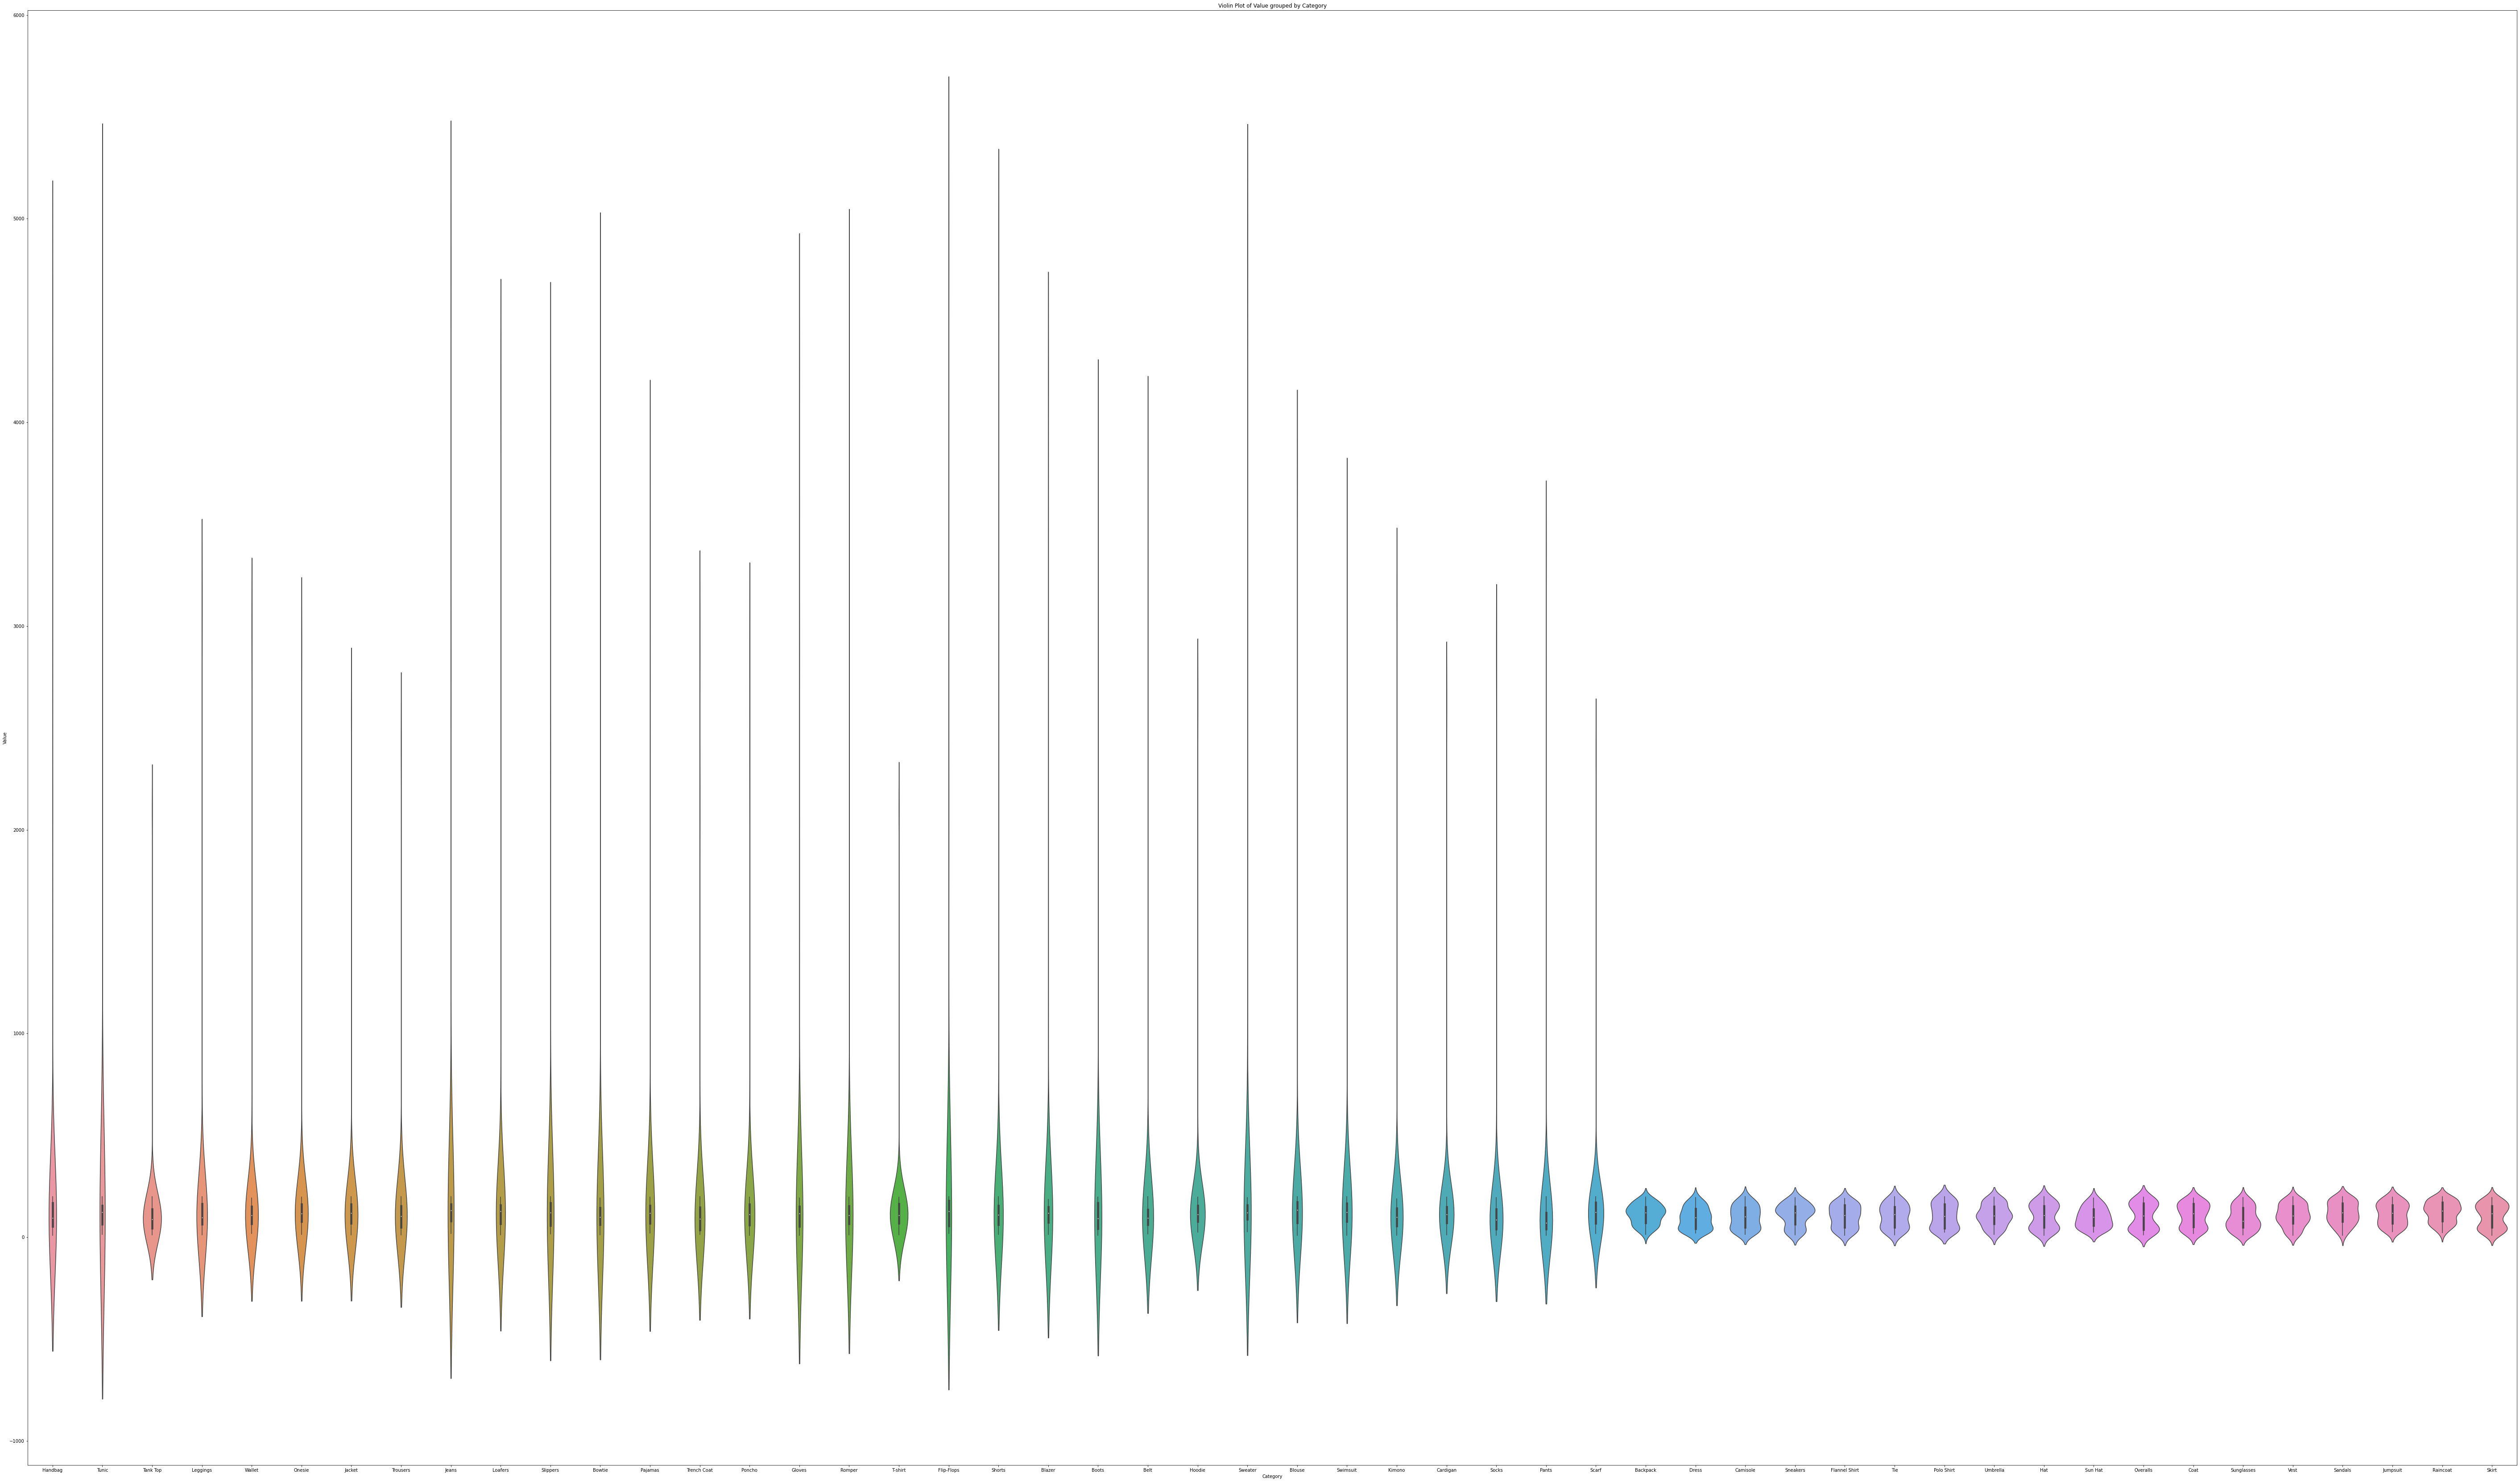

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100,60))
sns.violinplot(x='Category', y='Value', data=df2)
plt.title('Violin Plot of Value grouped by Category')


# show plot
plt.show()

Since there is a huge difference between the min and max values for approximately half of our items, the mean may not be the best value to use as an average value to replace the missing values in the dataset. I have chosen to utilize the median instead.

In [21]:
# Calculate the median for each category in the 'Value' column
category_median = df2.groupby('Category')['Value'].median()

# Display the computed median
print(category_median)

Category
Backpack         120.0
Belt              94.0
Blazer           119.5
Blouse           135.0
Boots             92.0
Bowtie           100.0
Camisole         100.5
Cardigan         112.0
Coat             117.5
Dress             96.5
Flannel Shirt    107.0
Flip-Flops       127.0
Gloves           116.0
Handbag           94.0
Hat              107.5
Hoodie           112.5
Jacket           119.0
Jeans            131.0
Jumpsuit         119.0
Kimono           100.0
Leggings          96.0
Loafers          127.0
Onesie           116.0
Overalls         104.5
Pajamas          119.0
Pants             71.0
Polo Shirt       104.0
Poncho           111.5
Raincoat         129.0
Romper           107.0
Sandals          120.0
Scarf            123.0
Shorts           110.5
Skirt            116.0
Slippers         120.5
Sneakers         121.0
Socks             86.0
Sun Hat           99.0
Sunglasses        80.0
Sweater          121.0
Swimsuit         122.0
T-shirt          107.0
Tank Top          88.5
Ti

In [22]:
#Mapping the new median values to the missing values corresponding to each item in the category 
df['Purchase Amount (USD)'] = df2['Value'].fillna(df2['Category'].map(category_median))

In [23]:
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)      0
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

I have decided to drop the NaN values for the feature column of Review Ratings as the ratings are more meaningful and could not be tampered with unlike the price that seems to fluctuate heavily for each item in each category.

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [26]:
df.shape

(3076, 6)

# Converting the last column into categorical numbers rather than string

# Credit Card : 0, Cash: 1

In [27]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card


In [28]:
df['Payment Method'].value_counts()

Credit Card    1594
Cash           1482
Name: Payment Method, dtype: int64

In [29]:
df['Payment Method'] = df['Payment Method'].map({'Credit Card': 0,
                                                     'Cash': 1})

In [30]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
1,4115,Tunic,2456.0,2023-07-11,2.0,0
2,4019,Tank Top,2102.0,2023-03-23,4.1,1
3,4097,Leggings,3126.0,2023-03-15,3.2,1
4,3997,Wallet,3003.0,2022-11-27,4.7,1
5,4080,Onesie,2914.0,2022-12-11,4.5,0


In [31]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
1,4115,Tunic,2456.0,2023-07-11,2.0,0
2,4019,Tank Top,2102.0,2023-03-23,4.1,1
3,4097,Leggings,3126.0,2023-03-15,3.2,1
4,3997,Wallet,3003.0,2022-11-27,4.7,1
5,4080,Onesie,2914.0,2022-12-11,4.5,0


In [32]:
df.dtypes

Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                    int64
dtype: object

In [33]:
df['Date Purchase'].dt.year.unique()

array([2023, 2022], dtype=int64)

In [34]:
df['Day'] = df['Date Purchase'].dt.day
df['Month'] = df['Date Purchase'].dt.month
df['Year'] = df['Date Purchase'].dt.year
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Day,Month,Year
1,4115,Tunic,2456.0,2023-07-11,2.0,0,11,7,2023
2,4019,Tank Top,2102.0,2023-03-23,4.1,1,23,3,2023
3,4097,Leggings,3126.0,2023-03-15,3.2,1,15,3,2023
4,3997,Wallet,3003.0,2022-11-27,4.7,1,27,11,2022
5,4080,Onesie,2914.0,2022-12-11,4.5,0,11,12,2022


In [35]:
df.drop('Date Purchase', axis = 1, inplace = True)
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method,Day,Month,Year
1,4115,Tunic,2456.0,2.0,0,11,7,2023
2,4019,Tank Top,2102.0,4.1,1,23,3,2023
3,4097,Leggings,3126.0,3.2,1,15,3,2023
4,3997,Wallet,3003.0,4.7,1,27,11,2022
5,4080,Onesie,2914.0,4.5,0,11,12,2022


In [36]:
df['Customer Reference ID'].value_counts()

4078    30
4034    29
3973    27
4063    26
4002    26
        ..
4079    11
4014    11
4097    11
4096    10
4112     7
Name: Customer Reference ID, Length: 166, dtype: int64

In [37]:
df['Item Purchased'].value_counts()

Belt             84
Skirt            81
Shorts           81
T-shirt          75
Tank Top         74
Pajamas          73
Camisole         73
Pants            71
Loafers          69
Hoodie           69
Cardigan         68
Wallet           67
Backpack         66
Kimono           66
Poncho           66
Trench Coat      66
Umbrella         66
Blazer           65
Coat             64
Onesie           64
Blouse           63
Vest             63
Handbag          63
Swimsuit         62
Sunglasses       62
Sneakers         62
Socks            61
Scarf            61
Flannel Shirt    61
Raincoat         60
Jacket           59
Hat              59
Boots            58
Tunic            58
Trousers         56
Polo Shirt       55
Gloves           54
Leggings         54
Dress            54
Sweater          54
Jeans            52
Overalls         52
Romper           51
Slippers         50
Sandals          50
Jumpsuit         49
Tie              49
Flip-Flops       47
Sun Hat          45
Bowtie           44


On average the clients who spent most money in 2022 and 2023 combined :

In [38]:
df.groupby('Customer Reference ID').describe()['Purchase Amount (USD)'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Customer Reference ID,,,,,,,,
4109,12.0,499.916667,1396.626550,26.0,52.50,105.50,137.500,4932.0
4044,23.0,404.521739,1040.554479,33.0,96.25,117.50,162.000,4771.0
4035,14.0,392.428571,1158.251399,14.0,46.50,96.25,120.125,4413.0
4097,11.0,386.409091,910.344408,11.0,89.00,119.50,172.500,3126.0
3976,16.0,373.062500,986.267068,31.0,101.25,135.00,153.500,4069.0
...,...,...,...,...,...,...,...,...
4041,14.0,81.285714,59.053012,13.0,25.25,80.75,117.750,193.0
4009,17.0,79.352941,41.302151,17.0,46.00,80.00,116.000,147.0
4069,18.0,78.555556,36.395252,15.0,53.50,65.50,108.250,157.0


In [39]:
df.groupby('Payment Method').describe()['Purchase Amount (USD)'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Payment Method,,,,,,,,
1,1482.0,146.308704,370.106732,10.0,71.0,110.5,146.0,4872.0
0,1594.0,137.756274,331.118229,10.0,67.0,109.0,144.0,4932.0


People prefer to pay bills that are higher with their credit card rather than cash 

The store's best selling items from highet sold quantity to least sold quantity :

In [40]:
df.groupby('Item Purchased').describe()['Review Rating'].sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Item Purchased,,,,,,,,
Belt,84.0,3.001190,1.183368,1.0,1.875,3.10,4.100,5.0
Skirt,81.0,3.196296,1.145256,1.0,2.200,3.30,4.200,5.0
Shorts,81.0,2.911111,1.172177,1.0,1.900,2.80,4.000,4.9
T-shirt,75.0,3.000000,1.171509,1.1,2.000,3.30,4.000,5.0
Tank Top,74.0,3.183784,1.095574,1.0,2.500,3.20,4.175,4.9
Camisole,73.0,2.652055,1.122511,1.0,1.600,2.50,3.500,4.8
Pajamas,73.0,2.820548,1.105788,1.0,1.900,2.60,3.900,5.0
Pants,71.0,3.061972,1.190602,1.2,1.900,3.10,4.000,5.0
Hoodie,69.0,2.982609,1.167193,1.0,2.000,2.90,4.000,4.9
